### <i> Detecting Earthquckes WIth Advnced Machine Learning Algorithms  </i>

In [2]:
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("cities_usa_latlon.csv")

In [4]:
df

,ID,STATE_CODE,STATE_NAME,CITY,COUNTY,LATITUDE,LONGITUDE
0,1,AK,Alaska,Adak,Aleutians West,55.999722,-161.207778
1,2,AK,Alaska,Akiachak,Bethel,60.891854,-161.392330
2,3,AK,Alaska,Akiak,Bethel,60.890632,-161.199325
3,4,AK,Alaska,Akutan,Aleutians East,54.143012,-165.785368
4,5,AK,Alaska,Alakanuk,Kusilvak,62.746967,-164.602280
...,...,...,...,...,...,...,...
29875,29876,WY,Wyoming,Worland,Washakie,44.013796,-107.956260
29876,29877,WY,Wyoming,Wright,Campbell,43.829349,-105.532327
29877,29878,WY,Wyoming,Wyarno,Sheridan,44.813333,-106.773333
29878,29879,WY,Wyoming,Yellowstone National Park,Park,44.853913,-110.674366


### <i> Dataset Overview </i>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29880 entries, 0 to 29879
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          29880 non-null  int64  
 1   STATE_CODE  29880 non-null  object 
 2   STATE_NAME  29880 non-null  object 
 3   CITY        29880 non-null  object 
 4   COUNTY      29858 non-null  object 
 5   LATITUDE    29880 non-null  float64
 6   LONGITUDE   29880 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ MB


In [7]:
df.describe()

,ID,LATITUDE,LONGITUDE
count,29880.000000,29880.000000,29880.000000
mean,14940.500000,39.193004,-90.384303
std,8625.757358,5.175798,14.883350
min,1.000000,17.963333,-174.213333
25%,7470.750000,36.038333,-96.614050
50%,14940.500000,39.794073,-87.962577
75%,22410.250000,42.314276,-79.836078
max,29880.000000,71.290556,-65.301389


### <i> Dataset PRerocessing </i>

In [9]:
# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 ID             0
STATE_CODE     0
STATE_NAME     0
CITY           0
COUNTY        22
LATITUDE       0
LONGITUDE      0
dtype: int64


In [10]:
# For now, let's fill missing 'COUNTY' values with 'Unknown'.
df['COUNTY'].fillna('Unknown', inplace=True)

In [11]:
# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 ID            0
STATE_CODE    0
STATE_NAME    0
CITY          0
COUNTY        0
LATITUDE      0
LONGITUDE     0
dtype: int64


In [12]:
# 3. Remove duplicates
# Assuming 'ID' is a unique identifier, we should drop duplicates based on this column.
df.drop_duplicates(subset='ID', inplace=True)

# 4. Validate data types
# Check the data types of each column
print("\nData types of each column:\n", df.dtypes)


Data types of each column:
 ID              int64
STATE_CODE     object
STATE_NAME     object
CITY           object
COUNTY         object
LATITUDE      float64
LONGITUDE     float64
dtype: object


In [13]:
# Convert 'ID' to a string if it should be a unique identifier, as int64 might be unnecessary
df['ID'] = df['ID'].astype(str)

# 5. Verify the cleaned dataset
print("\nDataset after preprocessing:\n", df.head())


Dataset after preprocessing:
   ID STATE_CODE STATE_NAME      CITY          COUNTY   LATITUDE   LONGITUDE
0  1         AK     Alaska      Adak  Aleutians West  55.999722 -161.207778
1  2         AK     Alaska  Akiachak          Bethel  60.891854 -161.392330
2  3         AK     Alaska     Akiak          Bethel  60.890632 -161.199325
3  4         AK     Alaska    Akutan  Aleutians East  54.143012 -165.785368
4  5         AK     Alaska  Alakanuk        Kusilvak  62.746967 -164.602280


### <i> Expolatory Data Analysis </i>

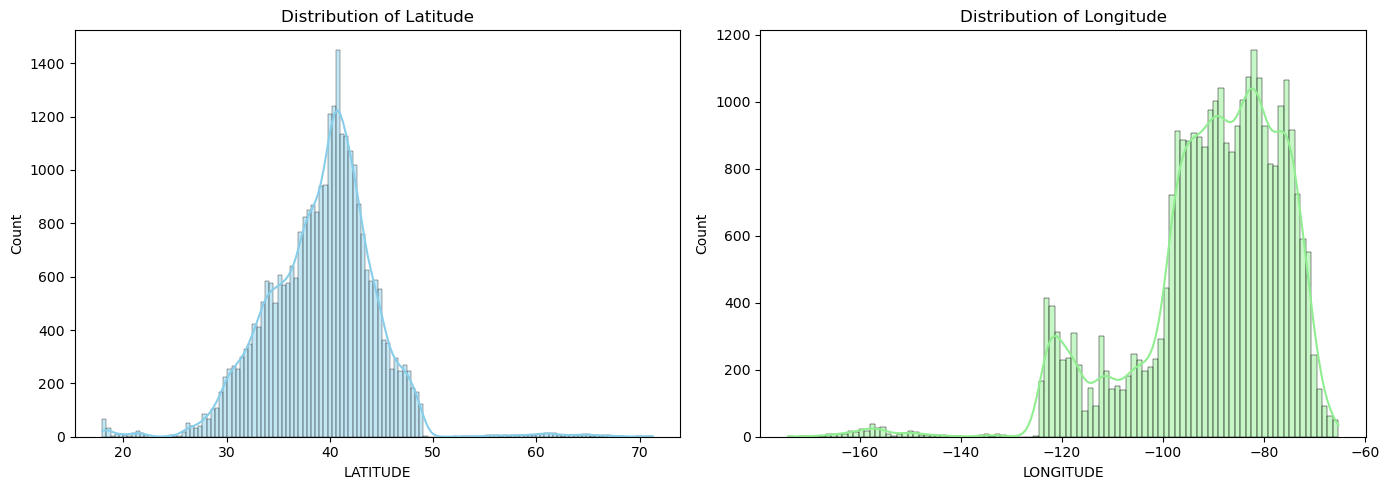

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# 2. Univariate Analysis
# Plot distributions for numerical columns: LATITUDE and LONGITUDE
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['LATITUDE'], kde=True, color='skyblue')
plt.title("Distribution of Latitude")

plt.subplot(1, 2, 2)
sns.histplot(df['LONGITUDE'], kde=True, color='lightgreen')
plt.title("Distribution of Longitude")

plt.tight_layout()
plt.show()


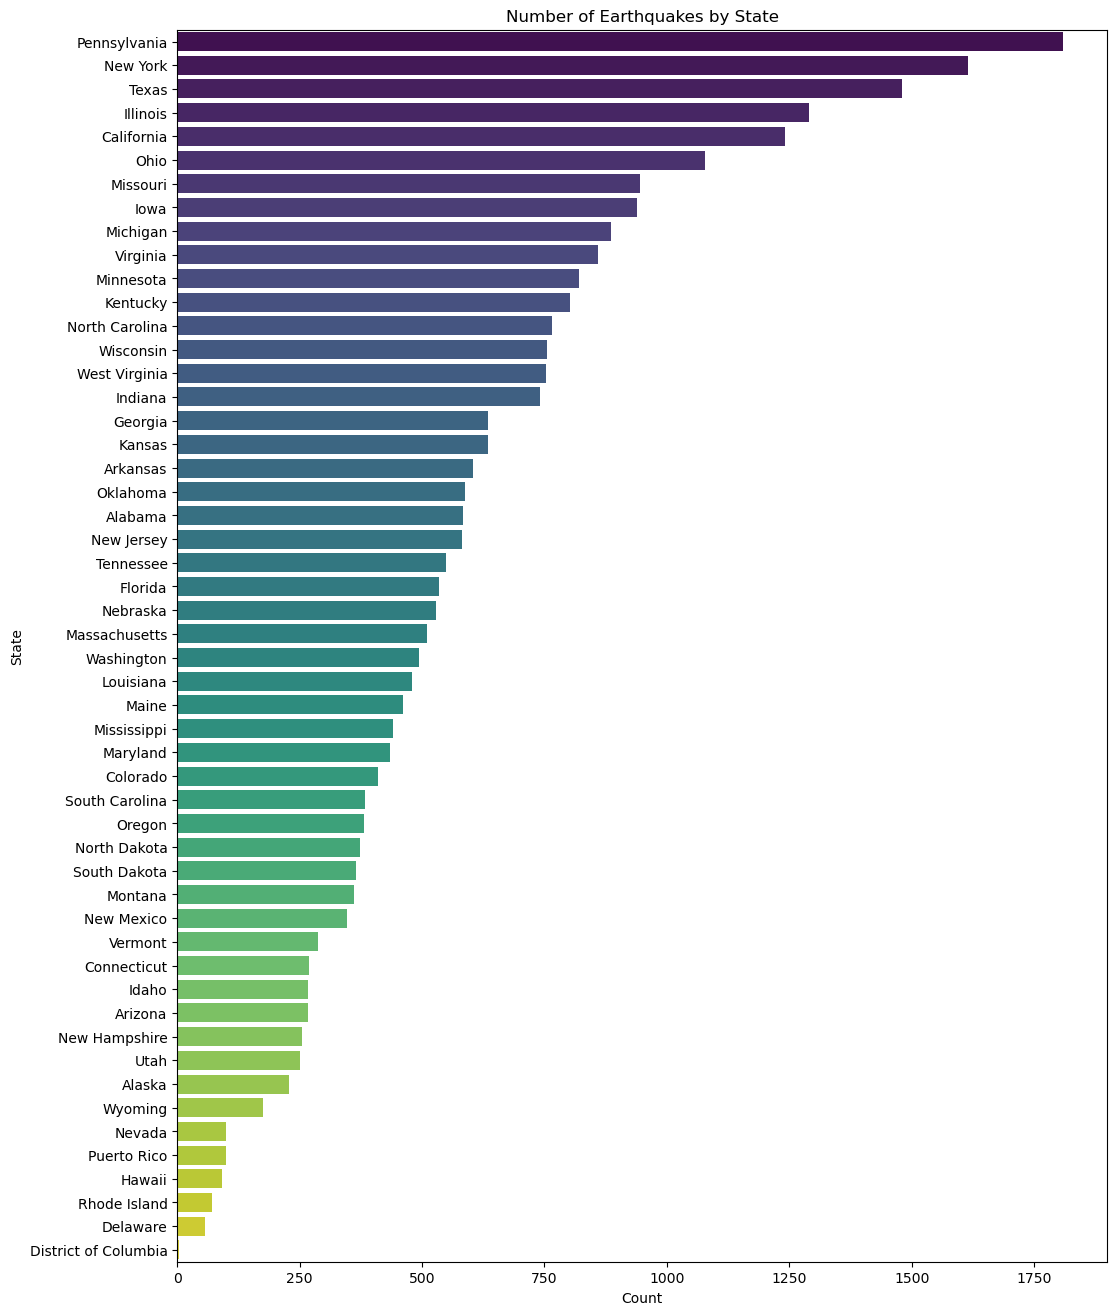

In [16]:
# 3. Categorical Analysis
# Frequency count for 'STATE_NAME'
plt.figure(figsize=(12, 16))
state_counts = df['STATE_NAME'].value_counts()
sns.barplot(y=state_counts.index, x=state_counts.values, palette='viridis')
plt.title("Number of Earthquakes by State")
plt.xlabel("Count")
plt.ylabel("State")
plt.show()

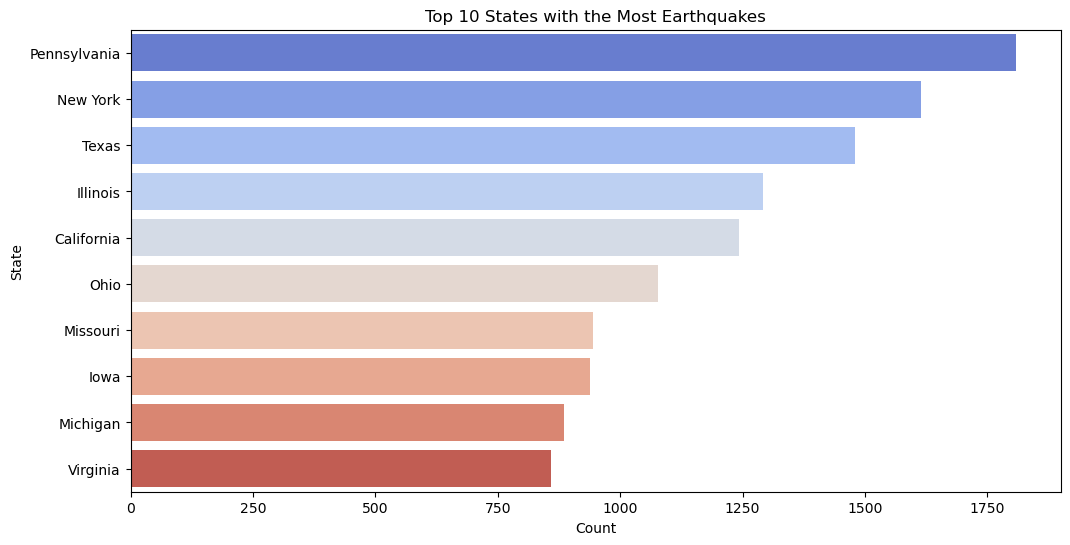

In [17]:
# 5. State-wise Analysis
plt.figure(figsize=(12, 6))
top_10_states = state_counts.head(10)
sns.barplot(y=top_10_states.index, x=top_10_states.values, palette='coolwarm')
plt.title("Top 10 States with the Most Earthquakes")
plt.xlabel("Count")
plt.ylabel("State")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [19]:
# 1. Define Target Variable
# Set a threshold for the number of earthquakes in a city to consider it "prone"
city_counts = df['CITY'].value_counts()
prone_cities = city_counts[city_counts > 10].index  # Cities with more than 10 earthquakes
df['Prone'] = df['CITY'].apply(lambda x: 1 if x in prone_cities else 0)

In [20]:
# 2. Feature Engineering
# Encoding categorical columns 'STATE_NAME' and 'CITY'
label_encoder_state = LabelEncoder()
df['STATE_NAME_ENCODED'] = label_encoder_state.fit_transform(df['STATE_NAME'])

label_encoder_city = LabelEncoder()
df['CITY_ENCODED'] = label_encoder_city.fit_transform(df['CITY'])

# Selecting features and target variable
X = df[['LATITUDE', 'LONGITUDE', 'STATE_NAME_ENCODED', 'CITY_ENCODED']]
y = df['Prone']

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <i> Modeling </i>
### <i> Logistic Regression </i>

In [23]:
# 3. Modeling with Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9215194109772423
Confusion Matrix:
 [[5507    0]
 [ 469    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      5507
           1       0.00      0.00      0.00       469

    accuracy                           0.92      5976
   macro avg       0.46      0.50      0.48      5976
weighted avg       0.85      0.92      0.88      5976



### <i> Random Forst </i>

In [25]:
# 4. Modeling with Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9258701472556894
Confusion Matrix:
 [[5498    9]
 [ 434   35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      5507
           1       0.80      0.07      0.14       469

    accuracy                           0.93      5976
   macro avg       0.86      0.54      0.55      5976
weighted avg       0.92      0.93      0.90      5976



### <i> XGBoost </i>

In [27]:
# 5. Modeling with XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9215194109772423
Confusion Matrix:
 [[5486   21]
 [ 448   21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      5507
           1       0.50      0.04      0.08       469

    accuracy                           0.92      5976
   macro avg       0.71      0.52      0.52      5976
weighted avg       0.89      0.92      0.89      5976

